Fitting 3 folds for each of 4320 candidates, totalling 12960 fits


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_featu

/home/codespace/.local/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=   1.5s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=20, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=   1.6s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=   1.6s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=20, n_estimators=200; total time=   0.4s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=20, n_estimators=200; total time=   0.4s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=20, n_estimators=400; total time=   0.5s
[CV] END bootstrap=False, max_d

/home/codespace/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
4320 fits failed out of a total of 12960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1282 fits failed with the following error:
Traceback (most recent call last):
  File "/home/codespace/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "

Best Parameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 20, 'n_estimators': 400}


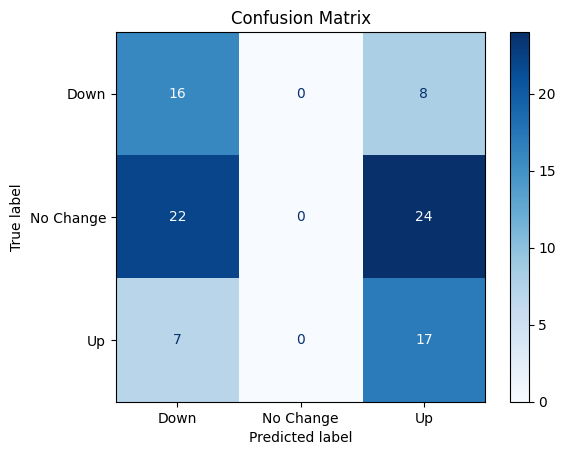

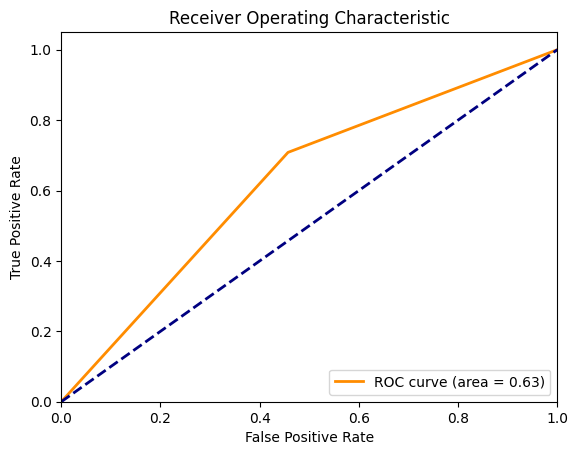

Regression Report:
Mean Squared Error: 0.9172151736146608
Mean Absolute Error: 0.8119306224771221
R-squared: 0.07032042431802421
Accuracy: 35.11%


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, confusion_matrix, accuracy_score, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt
import joblib

# Load your dataset
# Replace 'features.csv' and 'target.csv' with your actual file paths
price_data = pd.read_csv('../data/price_12.csv')

X_Cols = price_data[['RSI','k_percent','r_percent','Price_Rate_Of_Change','MACD','On Balance Volume']]
Y_Cols = price_data['Prediction']
X_train, X_test, y_train, y_test = train_test_split(X_Cols,Y_Cols, test_size=0.2, random_state=42)

# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'n_estimators': [200, 400, 600, 800, 1000, 1200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'bootstrap': [True, False]
}

# Initialize the random forest regressor
rf  = RandomForestRegressor(n_estimators=100, random_state=42)

# Perform Grid Search CV
rf_grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, verbose=2, n_jobs=-1)

# Fit the grid search model
rf_grid.fit(X_train, y_train)

# Best parameters from the grid search
best_params = rf_grid.best_params_
print("Best Parameters:", best_params)

# Train the model with the best parameters
best_rf = rf_grid.best_estimator_

# Make predictions on the testing set
predictions = best_rf.predict(X_test)

# Save the model
joblib.dump(best_rf, 'trained_model.pkl')

# Calculate evaluation metrics
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Determine actual and predicted directions
actual_directions = np.sign(y_test.values[1:] - y_test.values[:-1])
predicted_directions = np.sign(predictions[1:] - predictions[:-1])

# Ensure labels are -1, 0, 1 (for down, no change, up)
actual_directions = np.where(actual_directions > 0, 1, np.where(actual_directions < 0, -1, 0))
predicted_directions = np.where(predicted_directions > 0, 1, np.where(predicted_directions < 0, -1, 0))

# Calculate accuracy
accuracy = accuracy_score(actual_directions, predicted_directions)

# Generate the confusion matrix
conf_matrix = confusion_matrix(actual_directions, predicted_directions, labels=[-1, 0, 1])

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Down', 'No Change', 'Up'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Convert multi-class to binary classification: Up (1) vs. Not Up (0)
binary_actual = (actual_directions == 1).astype(int)
binary_predicted_proba = (predicted_directions == 1).astype(int)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(binary_actual, binary_predicted_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Print the regression report
print("Regression Report:")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")
print(f"Accuracy: {accuracy * 100:.2f}%")

